# Bibliotheken importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

# Daten einlesen und überblick über die Daten

In [2]:
df = pd.read_csv ('C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/Classification_Telecom/Telecom-Customer-Churn.csv')
df.shape 

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [7]:
df.drop(['customerID'], axis=1, inplace=True)

In [8]:
df_viz = df.copy()

In [9]:
# Kodierung von Variablen
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']

existing_multi_cols = [col for col in multi_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_multi_cols, drop_first=True)

In [10]:
X = df.drop('Churn', axis=1)
y = df['Churn']

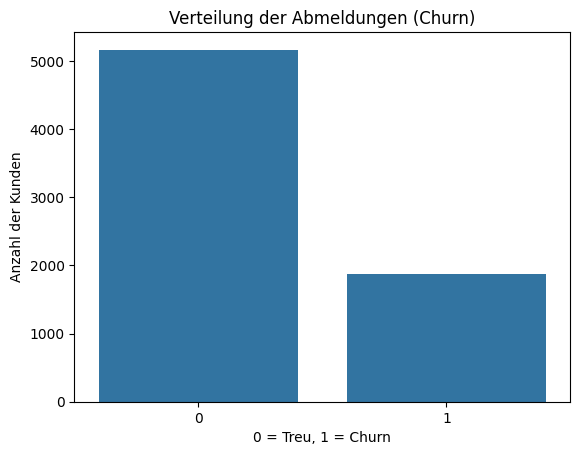

In [11]:
sns.countplot(x='Churn', data=df)
plt.title("Verteilung der Abmeldungen (Churn)")
plt.xlabel("0 = Treu, 1 = Churn")
plt.ylabel("Anzahl der Kunden")
plt.show()

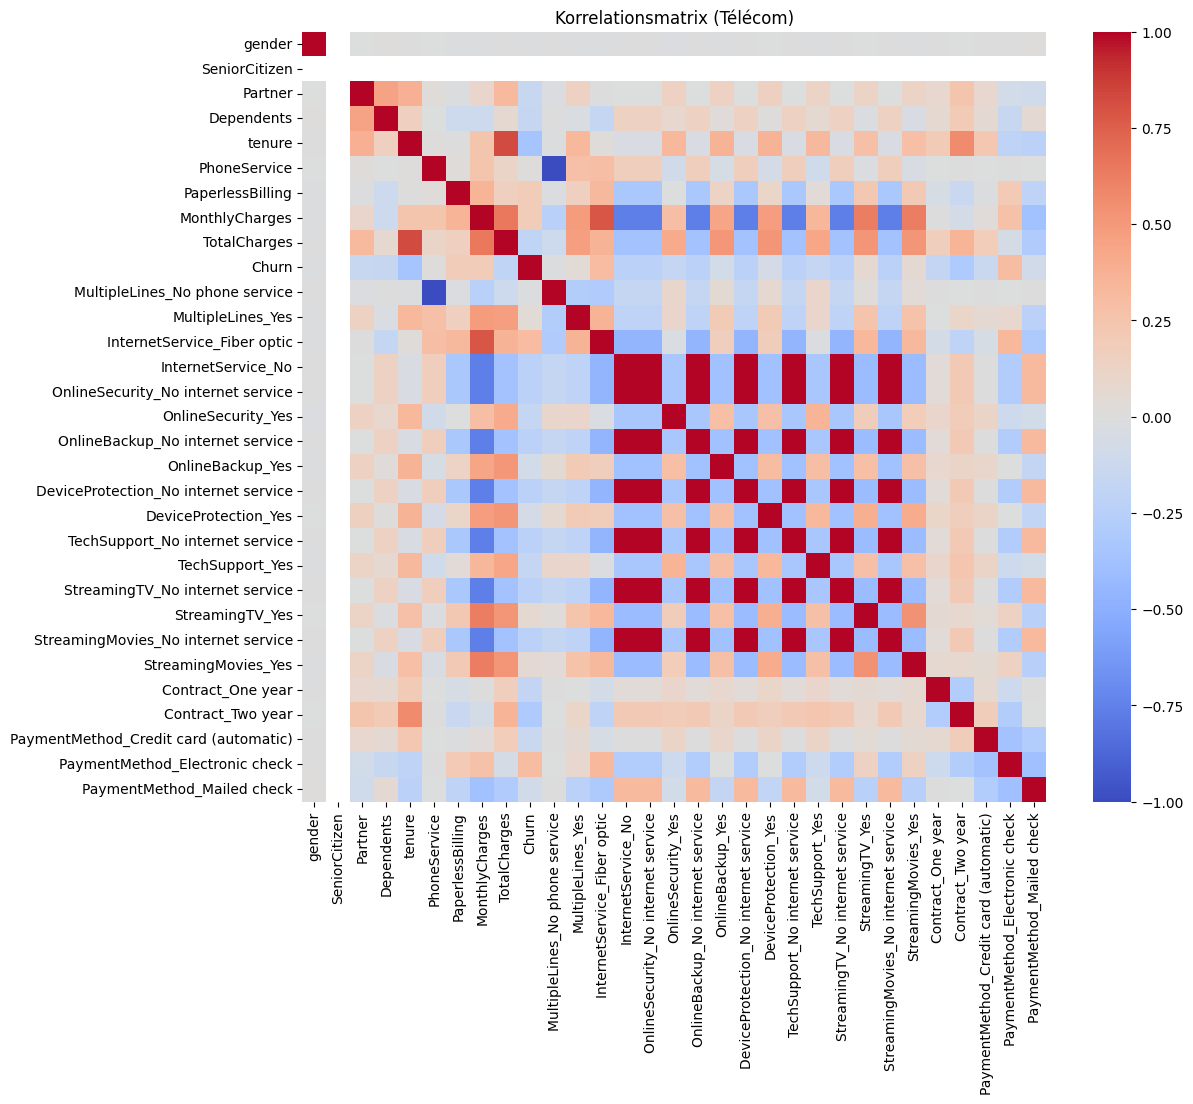

In [12]:
# Korrelation (nur wenn die Variablen numerisch sind)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Korrelationsmatrix (Télécom)")
plt.show()

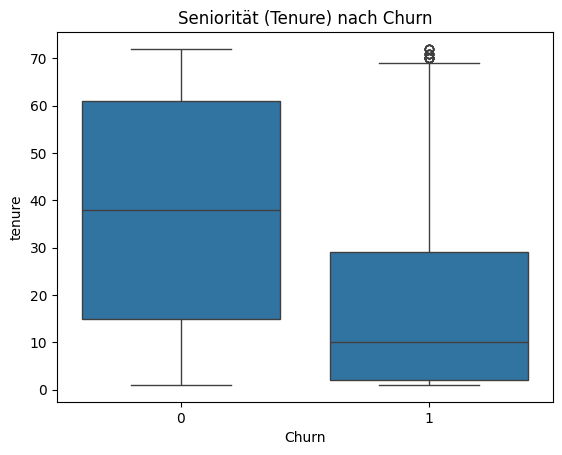

In [13]:
#  Dienstalter nach Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Seniorität (Tenure) nach Churn")
plt.show()

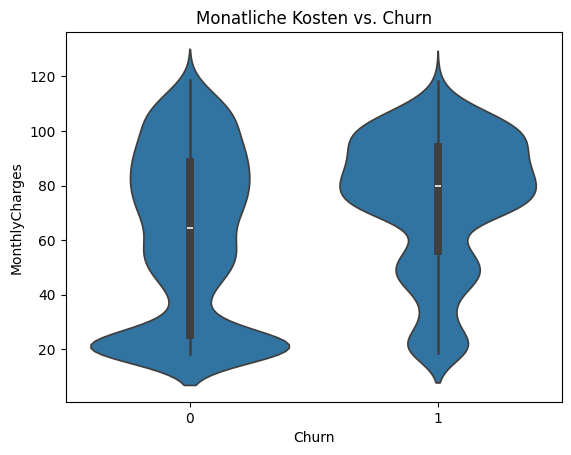

In [14]:
# Monthly Charges vs churn
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monatliche Kosten vs. Churn")
plt.show()

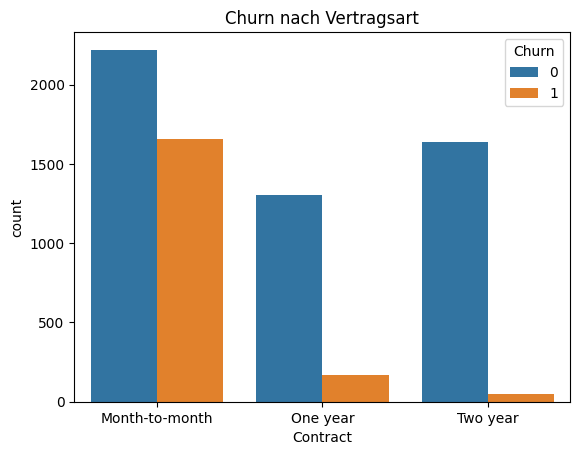

In [15]:
# Anzahl der Churns nach Vertragsart

df_viz = pd.read_csv("C:/Users/kuimi/Documents/Master_Freiberg/Formation_Professionnelle/Data Sciences/Code_Souces/Projets_Portfolio/Classification_Telecom/Telecom-Customer-Churn.csv")
df_viz = df_viz[df_viz['TotalCharges'] != " "]
df_viz['TotalCharges'] = pd.to_numeric(df_viz['TotalCharges'])
df_viz['Churn'] = df_viz['Churn'].map({'Yes': 1, 'No': 0})



sns.countplot(x='Contract', hue='Churn', data=df_viz)
plt.title("Churn nach Vertragsart")
plt.show()

In [21]:
# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\kuimi\Documents\Master_Freiberg\Formation_Professionnelle\Data Sciences\Code_Souces\Projets_Portfolio\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\kuimi\Documents\Master_Freiberg\Formation_Professionnelle\Data Sciences\Code_Souces\Projets_Portfolio\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\kuimi\Documents\Master_Freiberg\Formation_Professionnelle\Data Sciences\Code_Souces\Projets_Portfolio\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [17]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Modell trainieren
modell = RandomForestClassifier(n_estimators=100, random_state=42)
modell.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# Bewertung des Modells
y_pred = modell.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



In [20]:
# Speichern des Modells
joblib.dump(modell, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']